# [Log Normal Distribution]

## Normal Distribution: 
$X \; \backsim \; N(\mu, \sigma^2)$

* PDF: $f_X(x) = \frac{1}{\sigma_X \sqrt{2\pi}}\exp^{\frac{(x-\mu_X)^2}{2(\sigma_X)^2}}$
* Mean: $E[x] = \mu_X$
* Var: $V[X] = (\sigma_X)^2$

## Log Normal Distribution: 
$Y = \exp^X, \quad X = \ln(Y) \; \backsim \; N(\ln(Y); \mu_X, \sigma_X)$  
$Y \; \backsim \; LN(\mu_Y, \sigma_Y)$

for $f_X(x) = \frac{1}{\sigma_X \sqrt{2\pi}}\exp^{\frac{(x-\mu_X)^2}{2(\sigma_X)^2}}$  
* PDF: $f_Y(y) = f_X(x) \frac{dx}{dy} = \frac{1}{y \sigma_X \sqrt{2\pi}}\exp^{\frac{(x-\mu_X)^2}{2(\sigma_X)^2}}$
* Mean:  
    $E[Y] = \mu_Y = \exp^{\frac{\mu_X + (\sigma_X)^2}{2}}$  
    where  
    $E[X] = \mu_X = \ln(\mu_Y) - \frac{1}{2}\ln(1 + \frac{(\sigma_Y)^2}{(\mu_Y)^2})$
* Var:  
    $V[Y] = (\sigma_Y)^2 = (\mu_Y)^2 [e^{(\sigma_X)^2}-1]$  
    where  
    $V[X] = (\sigma_X)^2 = \ln(1 + \frac{(\sigma_Y)^2}{(\mu_Y)^2})$

#### Reference: https://statproofbook.github.io/P/lognorm-pdf.html

# Problem 2.  
Generates 3000 random log-normal stock price paths. Each stock has
Initial price:100, expected return(annual):0.05, volatility(annual):0.2, time horizon in years:1, business days in year:250.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

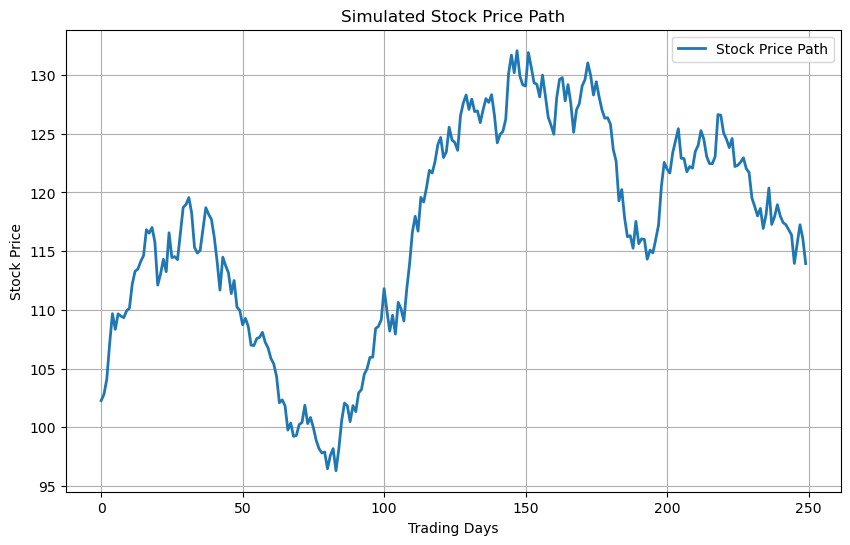

In [1]:
# Parameters
S0 = 100  # Initial stock price
mu = 0.05  # Expected annual return. (Log-normal mean)
sigma = 0.2  # Annual volatility. (Normal std)
T = 1  # Time horizon in years
days_per_year = 250

# Calculate daily drift and volatility
daily_mu = (mu - 0.5 * sigma**2) / days_per_year
daily_sigma = sigma / np.sqrt(days_per_year)

# Generate random daily returns using a standard normal distribution
np.random.seed(0)  # Set a seed for reproducibility
daily_returns = np.random.normal(daily_mu, daily_sigma, days_per_year * T)

# Calculate the cumulative sum of daily returns to get the stock price path
cumulative_returns = np.exp(np.cumsum(daily_returns))
stock_price_path = S0 * cumulative_returns

# Create an array of trading days
trading_days = np.arange(0, days_per_year * T)

# Plot the stock price path
plt.figure(figsize=(10, 6))
plt.plot(trading_days, stock_price_path, label='Stock Price Path', linewidth=2)
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Path')
plt.legend()
plt.grid(True)
plt.show()

### (a) Plot 3000 stocks. Then plot Top 30 stocks with highest ending period price

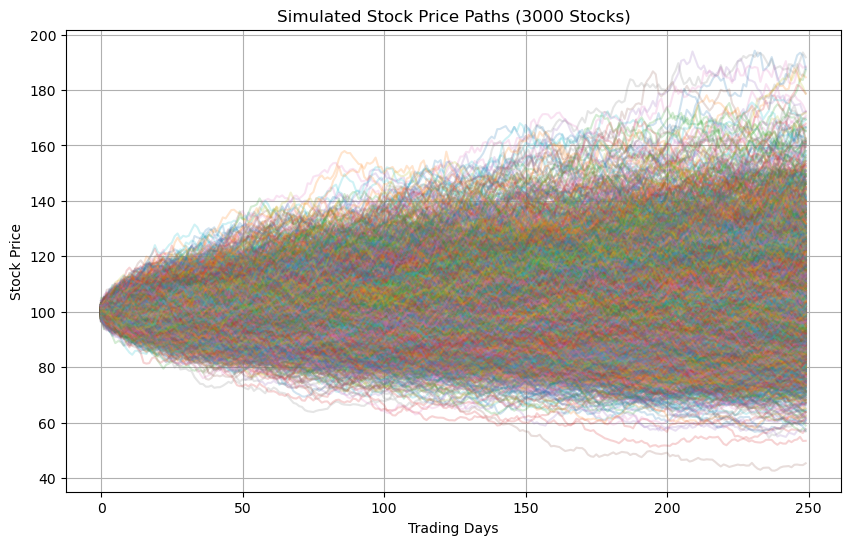

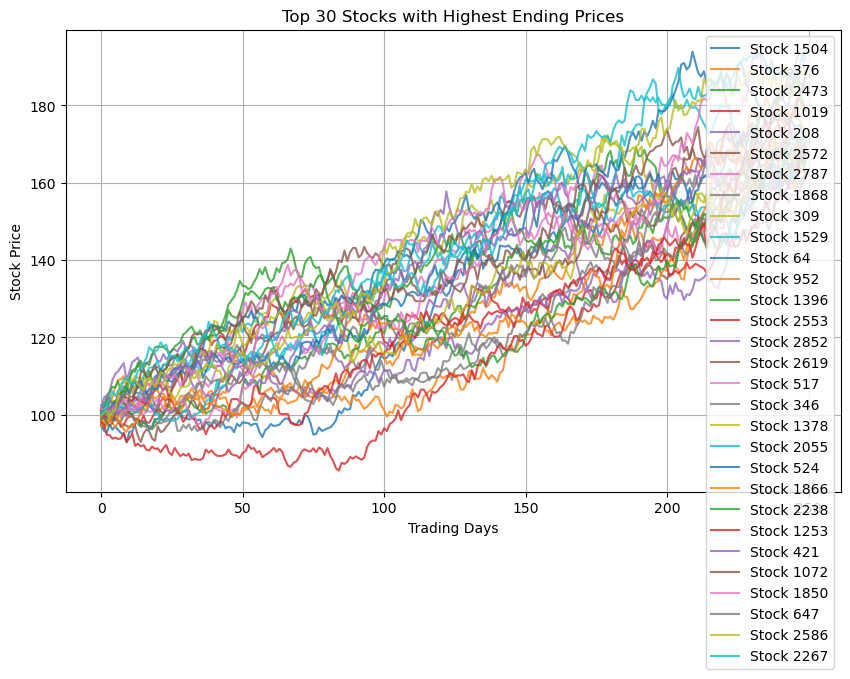

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for simulation
num_stocks = 3000
S0 = 100  # Initial stock price
mu = 0.05  # Expected annual return. (Log-normal mean)
sigma = 0.2  # Annual volatility. (Normal std)
T = 1  # Time horizon in years
days_per_year = 250

# Create an array of trading days
trading_days = np.arange(0, days_per_year * T)

# Simulate stock price paths for multiple stocks
np.random.seed(0)  # Set a seed for reproducibility
stock_prices = []

for _ in range(num_stocks):
    # Calculate daily drift and volatility
    daily_mu = (mu - 0.5 * sigma**2) / days_per_year
    daily_sigma = sigma / np.sqrt(days_per_year)
    
    # Generate random daily returns using a standard normal distribution
    daily_returns = np.random.normal(daily_mu, daily_sigma, days_per_year * T)
    
    # Calculate the cumulative sum of daily returns to get the stock price path
    cumulative_returns = np.exp(np.cumsum(daily_returns))
    stock_price_path = S0 * cumulative_returns
    stock_prices.append(stock_price_path)

# Plot the stock price paths for all 3000 stocks
plt.figure(figsize=(10, 6))
for i in range(num_stocks):
    plt.plot(trading_days, stock_prices[i], alpha=0.2)

plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Paths (3000 Stocks)')
plt.grid(True)

# Calculate the ending prices for all stocks
ending_prices = [stock[-1] for stock in stock_prices]

# Find the indices of the top 30 stocks with the highest ending prices
top_30_indices = np.argsort(ending_prices)[-30:]

# Plot the top 30 stocks with the highest ending prices
plt.figure(figsize=(10, 6))
for i in top_30_indices:
    plt.plot(trading_days, stock_prices[i], label=f'Stock {i}', alpha=0.8)

plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title('Top 30 Stocks with Highest Ending Prices')
plt.legend()
plt.grid(True)
plt.show()


### (b) Calculate the average Sharpe ratio of 3000 stocks and Top 30 stocks. Calculate the Sharpe ratio by (annual return / annual volatility).

In [4]:
# Parameters
risk_free_rate = 0.03  # Annual risk-free rate (for Sharpe ratio calculation)

# Initialize lists to store annual returns and annual volatilities
annual_returns = []
annual_volatilities = []

# Calculate annual returns and annual volatilities for all 3000 stocks
for i in range(num_stocks):
    final_price = stock_prices[i][-1]
    initial_price = S0
    annual_return = (final_price / initial_price) ** (1 / T) - 1
    daily_returns = np.log(stock_prices[i][1:] / stock_prices[i][:-1])
    annual_volatility = np.std(daily_returns) * np.sqrt(days_per_year)
    annual_returns.append(annual_return)
    annual_volatilities.append(annual_volatility)

# Calculate the Sharpe ratio for each stock
sharpe_ratios = [(r - risk_free_rate) / v for r, v in zip(annual_returns, annual_volatilities)]

# Calculate the average Sharpe ratio for all 3000 stocks
average_sharpe_3000 = np.mean(sharpe_ratios)

# Find the top 30 stocks with the highest Sharpe ratios
top_30_indices = np.argsort(sharpe_ratios)[-30:]

# Calculate the average Sharpe ratio for the top 30 stocks
average_sharpe_top_30 = np.mean([sharpe_ratios[i] for i in top_30_indices])

print("Average Sharpe Ratio for 3000 Stocks:", average_sharpe_3000)
print("Average Sharpe Ratio for Top 30 Stocks:", average_sharpe_top_30)


Average Sharpe Ratio for 3000 Stocks: 0.1408765620172136
Average Sharpe Ratio for Top 30 Stocks: 3.470086332359038


### (c) Is it okay to invest money on these 30 stocks? If not, why?

Since the Top 30 Stocks' Sharpe Ratio is over than 3, It looks okay to invest.

### (d) Now, we have longer time horizon in years:5. Repeat (a) and (b).

In [28]:
# Calculate Normal Distribution Variables from Log-normal mean.
def calculate_normal_distribution_variables(mu_log, sigma, days_per_year):
    daily_mu = (mu_log - 0.5 * sigma**2) / days_per_year
    daily_sigma = sigma / np.sqrt(days_per_year)

    return daily_mu, daily_sigma

# Simulate stock price paths for multiple stocks
def generate_stock_price_paths(num_stocks, mu_log, sigma, days_per_year):
    stock_prices = []
    
    for _ in range(num_stocks):    
        # Calculate daily drift and volatility
        daily_mu, daily_sigma = calculate_normal_distribution_variables(mu_log, sigma, days_per_year)

        # Generate random daily returns using a standard normal distribution
        daily_returns = np.random.normal(daily_mu, daily_sigma, days_per_year * T)
        
        # Calculate the cumulative sum of daily returns to get the stock price path
        cumulative_returns = np.exp(np.cumsum(daily_returns))
        stock_price_path = S0 * cumulative_returns
        stock_prices.append(stock_price_path)

    return stock_prices

# Plot the stock price paths for all 3000 stocks
def plot_stock_price_paths(stock_indices, trading_days, stock_prices, label_on, title):
    plt.figure(figsize=(10, 6))
    for i in stock_indices:
        if label_on:
            plt.plot(trading_days, stock_prices[i], label=f'Stock {i}', alpha=0.8)
        else:
            plt.plot(trading_days, stock_prices[i], alpha=0.2)

    plt.xlabel('Trading Days')
    plt.ylabel('Stock Price')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Calculate annual returns and annual volatilities
def calculate_annual_variables_from_lognormal_cumsums(num_stocks, stock_prices, rist_free_rate=0.3):
    # Initialize lists to store annual returns and annual volatilities
    annual_returns = []
    annual_volatilities = []

    # Calculate annual returns and annual volatilities for all stocks
    for i in range(num_stocks):
        final_price = stock_prices[i][-1]
        initial_price = S0
        annual_return = (final_price / initial_price) ** (1 / T) - 1
        daily_returns = np.log(stock_prices[i][1:] / stock_prices[i][:-1])
        annual_volatility = np.std(daily_returns) * np.sqrt(days_per_year)
        annual_returns.append(annual_return)
        annual_volatilities.append(annual_volatility)

    return annual_returns, annual_volatilities

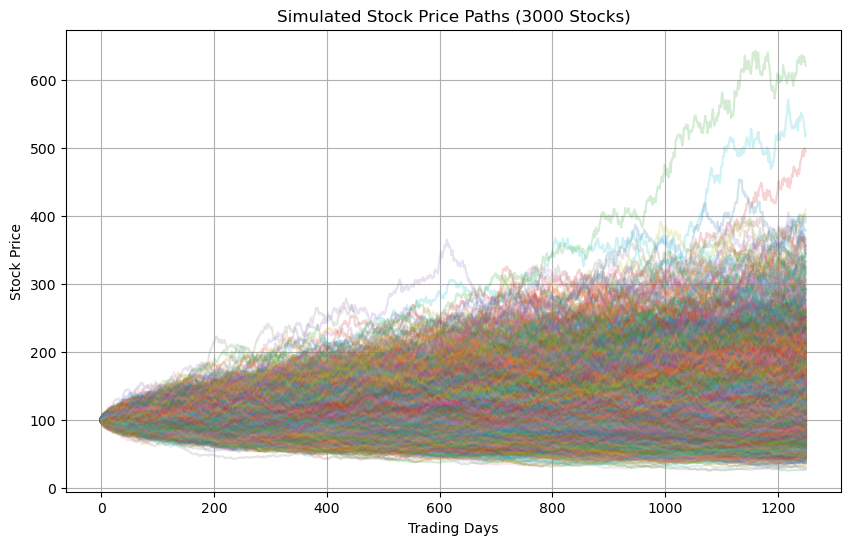

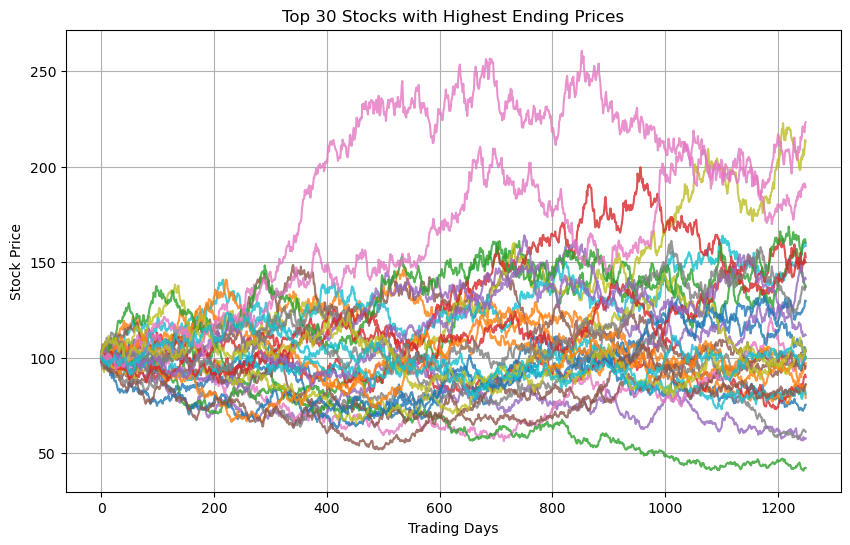

In [25]:
# Parameters for simulation
num_stocks = 3000
S0 = 100  # Initial stock price
mu = 0.05  # Expected annual return. (Log-normal mean)
sigma = 0.2  # Annual volatility. (Normal std)
T = 5  # Time horizon in years
days_per_year = 250

# Create an array of trading days
trading_days = np.arange(0, days_per_year * T)

np.random.seed(0)  # Set a seed for reproducibility

# Generate stock price paths for all 3000 stocks
stock_prices = generate_stock_price_paths(num_stocks, mu, sigma, days_per_year)

# Plot the stock price paths for all 3000 stocks
plot_stock_price_paths(range(num_stocks), trading_days, stock_prices, 
    label_on=False, title = f'Simulated Stock Price Paths ({num_stocks} Stocks)')

# Find the indices of the top 30 stocks with the highest ending prices
top_30_indices = np.argsort(ending_prices)[-30:]

# Plot the top 30 stocks with the highest ending prices
plot_stock_price_paths(top_30_indices, trading_days, stock_prices, 
    label_on=True, title = 'Top 30 Stocks with Highest Ending Prices')


In [29]:
# Calculate annual returns and annual volatilities for all 3000 stocks
annual_returns, annual_volatilities = calculate_annual_variables_from_lognormal_cumsums(num_stocks, stock_prices)

# Calculate the Sharpe ratio for each stock
sharpe_ratios = [(r - risk_free_rate) / v for r, v in zip(annual_returns, annual_volatilities)]

# Calculate the average Sharpe ratio for all 3000 stocks
average_sharpe_3000 = np.mean(sharpe_ratios)

# Find the top 30 stocks with the highest Sharpe ratios
top_30_indices = np.argsort(sharpe_ratios)[-30:]

# Calculate the average Sharpe ratio for the top 30 stocks
average_sharpe_top_30 = np.mean([sharpe_ratios[i] for i in top_30_indices])

print("Average Sharpe Ratio for 3000 Stocks:", average_sharpe_3000)
print("Average Sharpe Ratio for Top 30 Stocks:", average_sharpe_top_30)

Average Sharpe Ratio for 3000 Stocks: 0.029198902467256392
Average Sharpe Ratio for Top 30 Stocks: 1.3592378984277185
